<a href="https://colab.research.google.com/github/Sanandthe11/K_mean/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import important libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
#upload files to colab
from google.colab import files
uploaded = files.upload()

Saving electric_vehicles_spec_2025.csv.csv to electric_vehicles_spec_2025.csv.csv


In [4]:
df = pd.read_csv('electric_vehicles_spec_2025.csv.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [5]:
#dropping unneccasary columns
df = df.drop(['model','battery_type','source_url','fast_charge_port'], axis=1)
df.head()

,brand,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,Abarth,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,Abarth,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,Abarth,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
3,Abarth,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
4,Aiways,150,60.0,NaN,310.0,156,315,7.5,78.0,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV


<Axes: >

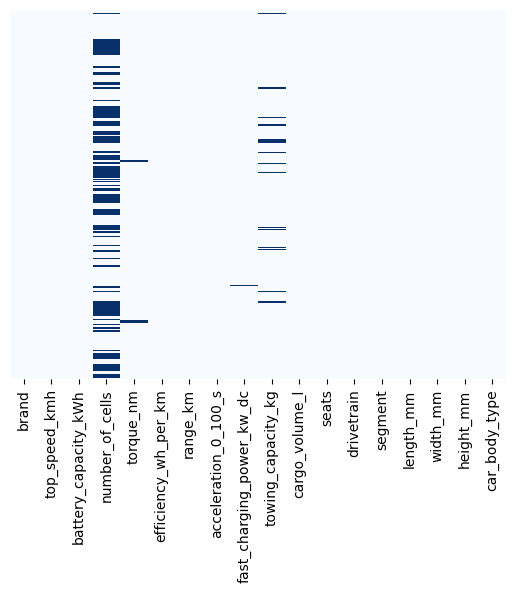

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [7]:
df.isnull().sum()

,0
brand,0
top_speed_kmh,0
battery_capacity_kWh,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0
fast_charging_power_kw_dc,1
towing_capacity_kg,26


In [8]:
#filling cells with NaN
df = df.fillna(method='ffill')

/tmp/ipython-input-636341629.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [9]:
#information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   top_speed_kmh              478 non-null    int64  
 2   battery_capacity_kWh       478 non-null    float64
 3   number_of_cells            478 non-null    float64
 4   torque_nm                  478 non-null    float64
 5   efficiency_wh_per_km       478 non-null    int64  
 6   range_km                   478 non-null    int64  
 7   acceleration_0_100_s       478 non-null    float64
 8   fast_charging_power_kw_dc  478 non-null    float64
 9   towing_capacity_kg         478 non-null    float64
 10  cargo_volume_l             478 non-null    object 
 11  seats                      478 non-null    int64  
 12  drivetrain                 478 non-null    object 
 13  segment                    478 non-null    object 

In [10]:
new_df = df.copy()
new_df.drop(["segment", "brand"], axis=1)

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,length_mm,width_mm,height_mm,car_body_type
0,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,FWD,3673,1683,1518,Hatchback
1,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,FWD,3673,1683,1518,Hatchback
2,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,FWD,4187,1779,1557,SUV
3,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,FWD,4187,1779,1557,SUV
4,150,60.0,102.0,310.0,156,315,7.5,78.0,0.0,496,5,FWD,4680,1865,1700,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,210,71.0,110.0,440.0,148,365,6.0,240.0,2000.0,539,5,RWD,4787,1930,1650,SUV
474,190,49.0,110.0,343.0,148,265,5.9,70.0,1600.0,362,5,RWD,4432,1836,1566,SUV
475,190,65.0,110.0,343.0,146,360,5.6,114.0,1600.0,362,5,RWD,4432,1836,1566,SUV
476,190,65.0,110.0,543.0,153,350,3.8,114.0,1600.0,362,5,AWD,4432,1836,1566,SUV


In [11]:
#labels = df["segment"].values

In [12]:
del new_df["brand"]
del new_df["segment"]
new_df.head()


,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,length_mm,width_mm,height_mm,car_body_type
0,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,FWD,3673,1683,1518,Hatchback
1,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,FWD,3673,1683,1518,Hatchback
2,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,FWD,4187,1779,1557,SUV
3,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,FWD,4187,1779,1557,SUV
4,150,60.0,102.0,310.0,156,315,7.5,78.0,0.0,496,5,FWD,4680,1865,1700,SUV


In [13]:
#encoding str options to numbers
encoder = LabelEncoder()
new_df['drivetrain'] = encoder.fit_transform(new_df['drivetrain'])
new_df['car_body_type'] = encoder.fit_transform(new_df['car_body_type'])

In [14]:
#convert certain cell to str
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].replace('10 Banana Boxes', '511')
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].replace('13 Banana Boxes', '645')
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].replace('31 Banana Boxes', '500')
new_df['cargo_volume_l'] = new_df['cargo_volume_l'].astype(int)

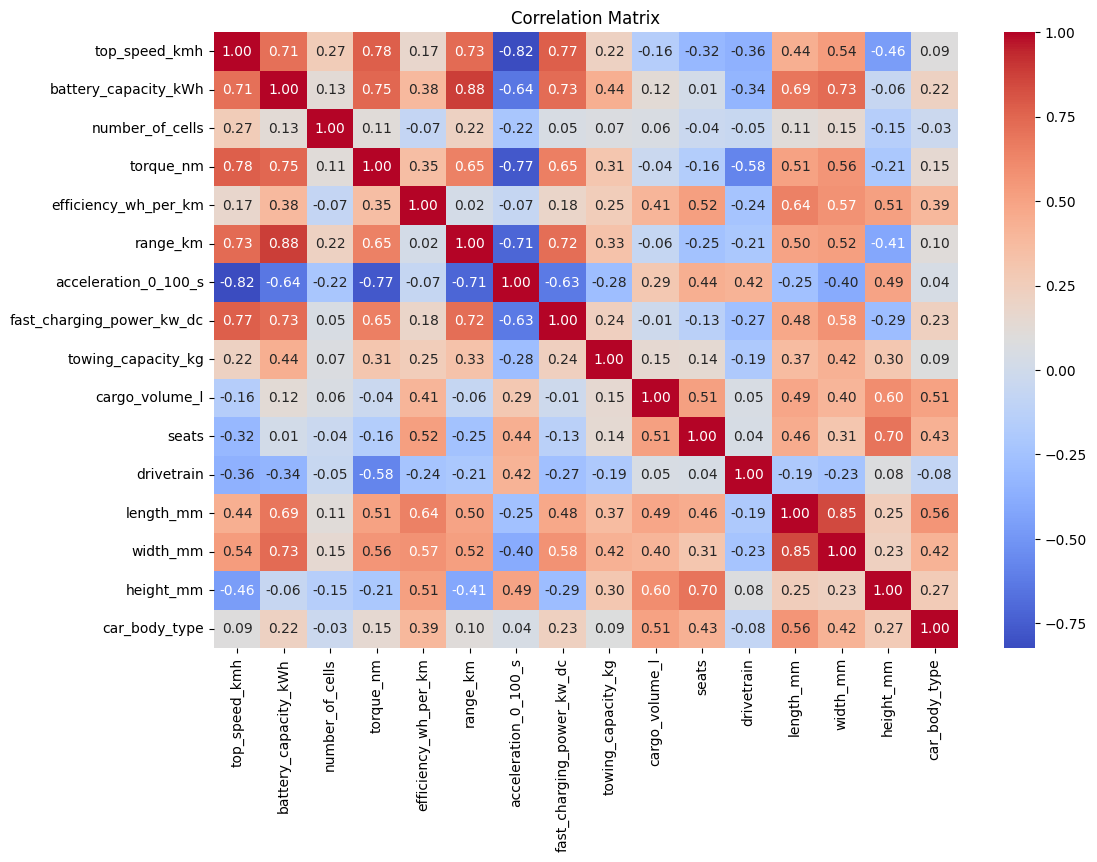

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
pip install kneed

In [17]:
import itertools
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
results = []
eps_values = []
k_indices = []

for col1, col2 in itertools.combinations(new_df.columns, 2):
    X = new_df[[col1, col2]]
    X_scaled = scaler.fit_transform(X)

    # Iterate over n_neighbors from 15 to 25
    for k in range(15, 26):
        neigh = NearestNeighbors(n_neighbors=k)
        neigh.fit(X_scaled)
        distances, indices = neigh.kneighbors(X_scaled)
        neighbor_index = k // 2
        distances = np.sort(distances[:, neighbor_index])

        # Find the knee
        kneedle = KneeLocator(range(len(distances)), distances,
                              curve="convex", direction="increasing")
        if kneedle.knee is not None:
             eps_values.append(distances[kneedle.knee])
             k_indices.append(neighbor_index)

    # Aggregate eps values (median is more robust than mean)
    if eps_values:
        eps_value = np.mean(eps_values)
        avg_k_index = int(np.mean(k_indices))

        # Run DBSCAN once with the aggregated eps
        db = DBSCAN(eps=eps_value, min_samples=5).fit(X_scaled)
        labels = db.labels_

        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
        else:
            score = -1

        # FIX: Added avg_k_index to the tuple to match the print statement
        results.append((col1, col2, eps_value, avg_k_index, score,
                        len(set(labels)), list(labels).count(-1)))

# Sort by silhouette score
results_sorted = sorted(results, key=lambda x: x[4], reverse=True)

for r in results_sorted:
    print(f"Pair: ({r[0]}, {r[1]}), eps(mean)={r[2]:.3f}, "
          f"k//2(avg)={r[3]}, silhouette={r[4]:.3f}, "
          f"clusters={r[5]}, noise={r[6]}")

Pair: (number_of_cells, seats), eps(mean)=1.654, k//2(avg)=9, silhouette=0.828, clusters=3, noise=5
Pair: (number_of_cells, cargo_volume_l), eps(mean)=1.593, k//2(avg)=9, silhouette=0.810, clusters=2, noise=0
Pair: (number_of_cells, efficiency_wh_per_km), eps(mean)=1.449, k//2(avg)=9, silhouette=0.809, clusters=3, noise=4
Pair: (number_of_cells, width_mm), eps(mean)=1.773, k//2(avg)=9, silhouette=0.788, clusters=2, noise=0
Pair: (number_of_cells, car_body_type), eps(mean)=1.861, k//2(avg)=9, silhouette=0.788, clusters=3, noise=2
Pair: (number_of_cells, fast_charging_power_kw_dc), eps(mean)=1.482, k//2(avg)=9, silhouette=0.787, clusters=2, noise=0
Pair: (number_of_cells, length_mm), eps(mean)=1.738, k//2(avg)=9, silhouette=0.784, clusters=2, noise=0
Pair: (number_of_cells, height_mm), eps(mean)=1.814, k//2(avg)=9, silhouette=0.776, clusters=3, noise=2
Pair: (efficiency_wh_per_km, height_mm), eps(mean)=2.042, k//2(avg)=9, silhouette=0.758, clusters=2, noise=4
Pair: (efficiency_wh_per_km,

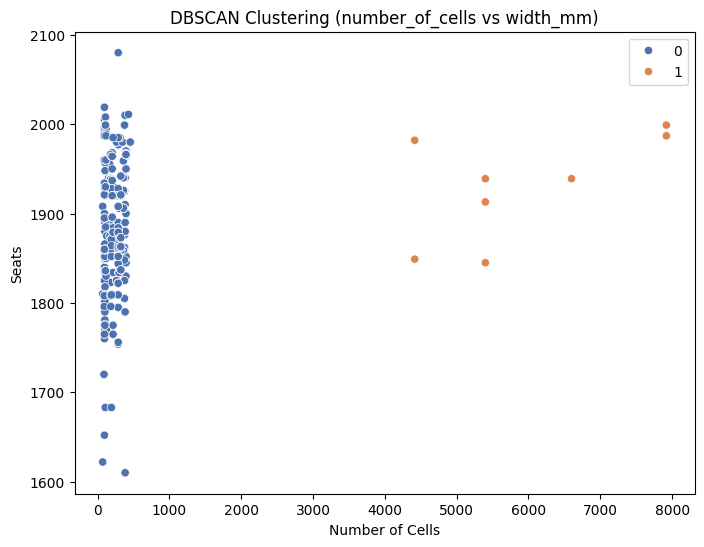

In [20]:
X = new_df[["number_of_cells", "width_mm"]].values
X_scaled = StandardScaler().fit_transform(X)

# Run DBSCAN
db = DBSCAN(eps=1.773, min_samples=9).fit(X_scaled)
labels = db.labels_

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=new_df["number_of_cells"], y=df["width_mm"],
                hue=labels, palette="deep", legend="full")
plt.title("DBSCAN Clustering (number_of_cells vs width_mm)")
plt.xlabel("Number of Cells")
plt.ylabel("Seats")
plt.show()
